In [13]:
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
def draw_graph(G, title, pos=None, edge_labels=None):
    plt.figure(figsize=(6, 4))
    if not pos:
        pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='gold', edge_color='darkviolet', node_size=2000, arrows=True)
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.title(title)
        plt.axis('off')
        plt.show()

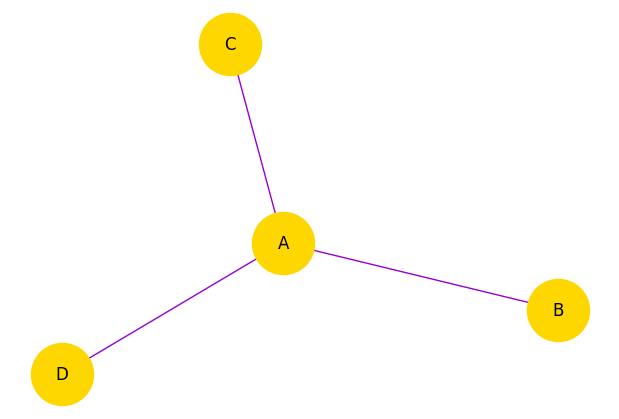

In [26]:
#1 Grafo no dirigido 
G1 = nx.Graph()
G1.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D')])
draw_graph(G1, "Grafo no dirigido")

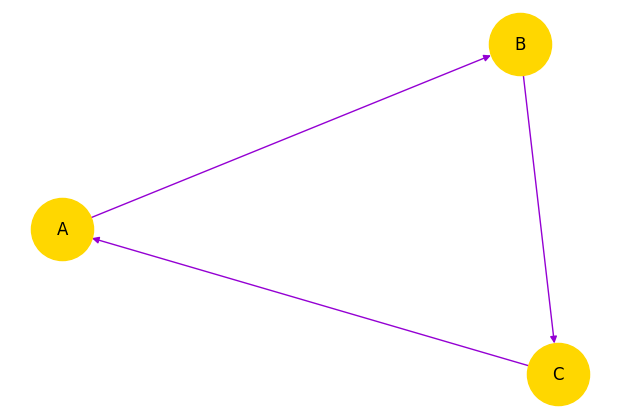

In [16]:
#2 Grafo dirigido
G2 = nx.DiGraph()
G2.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A')])
draw_graph(G2, "Grafo dirigido")

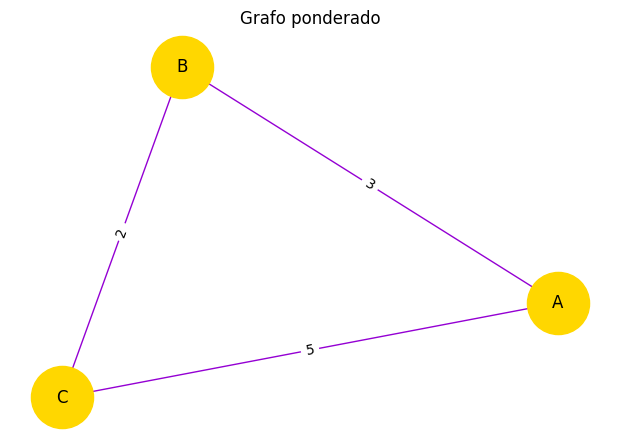

In [17]:
# 3 Grafo ponderado
G3 = nx.Graph()
G3.add_weighted_edges_from([('A', 'B', 3), ('B', 'C', 2), ('C', 'A', 5)])
weights = nx.get_edge_attributes(G3, 'weight')
draw_graph(G3, "Grafo ponderado", edge_labels=weights)

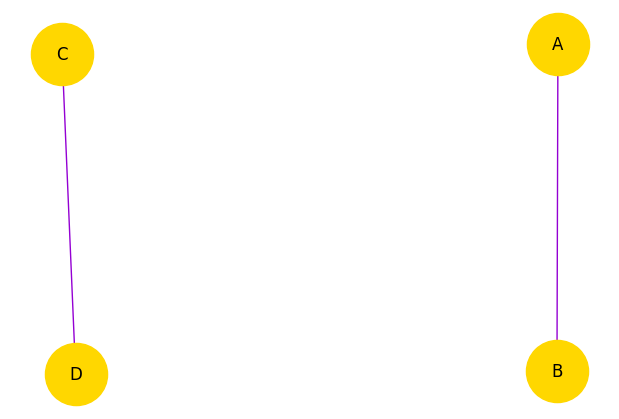

In [21]:
# Grafo no conexo
G4 = nx.Graph()
G4.add_edges_from([('A', 'B'), ('C', 'D')]) #Dos componentes desconectados
draw_graph(G4, "Grafo no conexo")

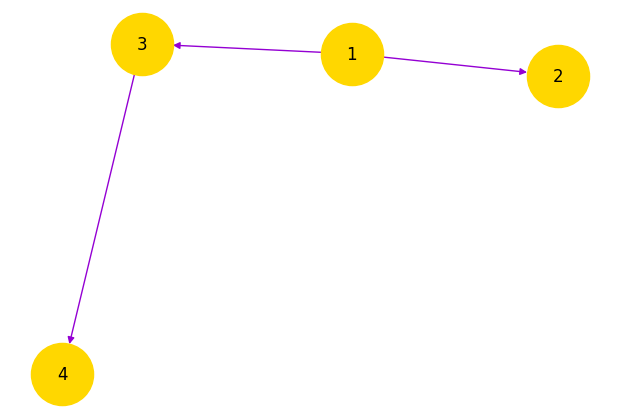

In [ ]:
# 5 Grafo Aciclico dirigido (DAG)
G5 = nx.DiGraph()
G5.add_edges_from([('1', '2'), ('1', '3'), ('3', '4')]) #no hay ciclos
draw_graph(G5, "Grafo dirigido aciclico (DAG)")

In [32]:
#Rutas con barrios
rutas = [
    ("Centro", "San Juan"),
    ("San Juan", "Villa Marlen"),
    ("Centro", "Santa Ana"),
    ("Santa Ana", "Villa Marlen"),
    ("Villa Marlen", "Altos de Santa Helena"),
    ("Altos de Santa Helena", "Los Pinaos")
]

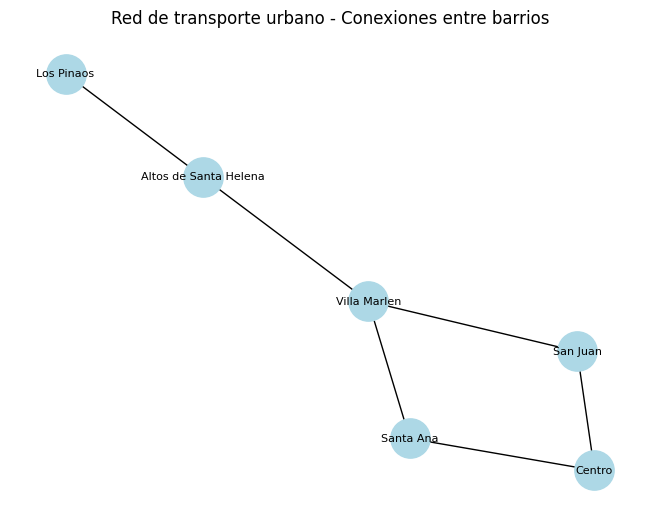

Barrios conectados con centro: ['San Juan', 'Santa Ana']
Camino mas corto de centro a altos de santa helena: ['Centro', 'San Juan', 'Villa Marlen', 'Altos de Santa Helena']


In [33]:
# Crear el grafo de la red de transporte
G = nx.Graph()
G.add_edges_from(rutas)

#Visualizar el grafo
plt.Figure(figsize=(8, 4))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=8)
plt.title("Red de transporte urbano - Conexiones entre barrios")
plt.show()

#Que barrios estan conectados directamente con centro 
print("Barrios conectados con centro:", list(G.neighbors("Centro")))

#Cual es el camino mas corto entre centro y altos del norte
camino = nx.shortest_path(G, "Centro", "Altos de Santa Helena")
print("Camino mas corto de centro a altos de santa helena:", camino)